<a href="https://colab.research.google.com/github/reagenhuskey/cs290/blob/main/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [4]:
df['species'] = iris.target

In [5]:
target_names = {
    0:'setosa',
    1:'versicolor',
    2:'virginica'
}

df['species_name'] = df['species'].map(target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [6]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [7]:
def random_centroid(df, k):
  columns_to_drop = ['species', 'species_name']
  existing_columns = df.columns
  columns_to_drop = [col for col in columns_to_drop if col in existing_columns]
  sample = df.sample(k).drop(columns=columns_to_drop)
  return sample.reset_index(level = 0, drop=True)

In [8]:
random_centroid(df, 3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,6.0,3.4,4.5,1.6
1,7.7,2.8,6.7,2.0
2,6.3,2.9,5.6,1.8


In [9]:
random_centroid(df, 3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,6.4,2.9,4.3,1.3
1,5.8,2.7,3.9,1.2
2,6.5,2.8,4.6,1.5


In [10]:
def draw_clusters(df, centroids, iter, x_col='petal length (cm)', y_col='petal width (cm)', s='species_name'):
  plt.figure(figsize=(5, 3))
  #plot each cluster
  sns.scatterplot(x = x_col, y = y_col, data = df, hue=s, palette = sns.color_palette("magma"))
  #plot centroids
  sns.scatterplot(x = x_col, y = y_col, data = centroids, c = "black", marker="X", s = 200, label="centroids")

  plt.title(f"Iteration {iter}")
  plt.legend()
  plt.show()

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


<ipython-input-10-fcd8a68ba6e3>:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.scatterplot(x = x_col, y = y_col, data = df, hue=s, palette = sns.color_palette("magma"))


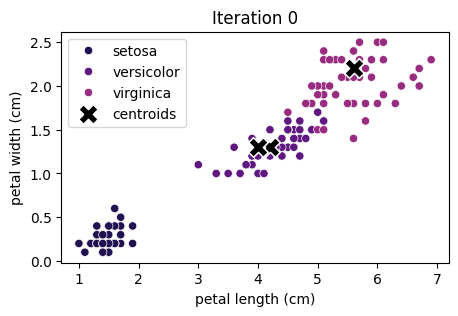

In [12]:
draw_clusters(df, random_centroid(df, 3), 0)

In [13]:
def find_clusters(df, centroids, s, draw=True, feature_columns=None):
  og_centroids = pd.DataFrame()
  iter = 0
  #run while new centroids are different from the old ones
  while not og_centroids.equals(centroids):
    #update og centroids
    og_centroids = centroids.copy()
    if feature_columns is None:
      feature_columns = df.select_dtypes(include=['number']).columns[:2].tolist()
    for i in df.index: # each point in df
      distances = [] # distances from current point to each centroid
      #for each centroid/row
      for _, row in centroids.iterrows():
        #calculate the euclidean distance from current point to the current row/centroid.
        distances.append(euclidean_distance(df.loc[i, feature_columns], row[feature_columns]))
      best_cluster = np.argmin(distances)
      df.loc[i, 'best_cluster'] = best_cluster #update centroids
    if draw:
      draw_clusters(df, centroids, iter, feature_columns[0], feature_columns[1], s)
    iter += 1
    #recalculate centroids
    centroids = df.groupby('best_cluster')[feature_columns].mean()
  return df # after centroids have been stabilized, return df now that it contains cluster assignments

<ipython-input-10-fcd8a68ba6e3>:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.scatterplot(x = x_col, y = y_col, data = df, hue=s, palette = sns.color_palette("magma"))


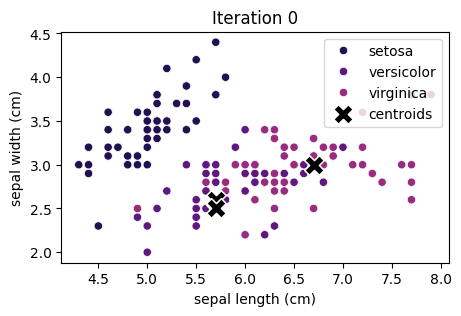

<ipython-input-10-fcd8a68ba6e3>:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.scatterplot(x = x_col, y = y_col, data = df, hue=s, palette = sns.color_palette("magma"))


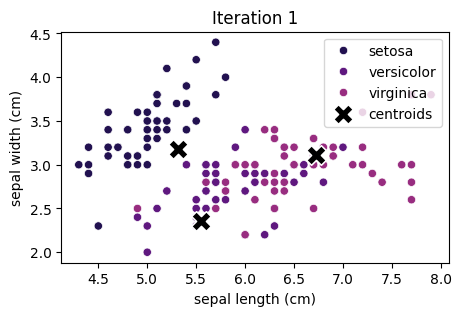

<ipython-input-10-fcd8a68ba6e3>:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.scatterplot(x = x_col, y = y_col, data = df, hue=s, palette = sns.color_palette("magma"))


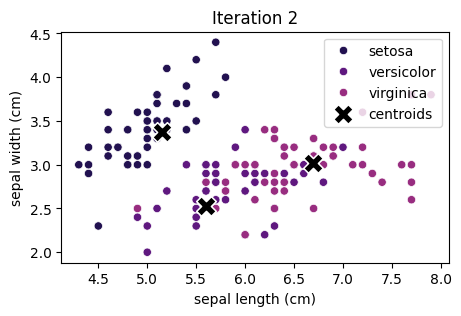

<ipython-input-10-fcd8a68ba6e3>:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.scatterplot(x = x_col, y = y_col, data = df, hue=s, palette = sns.color_palette("magma"))


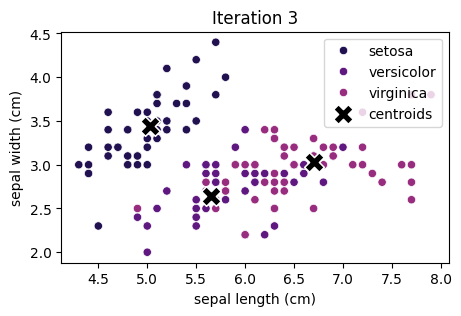

<ipython-input-10-fcd8a68ba6e3>:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.scatterplot(x = x_col, y = y_col, data = df, hue=s, palette = sns.color_palette("magma"))


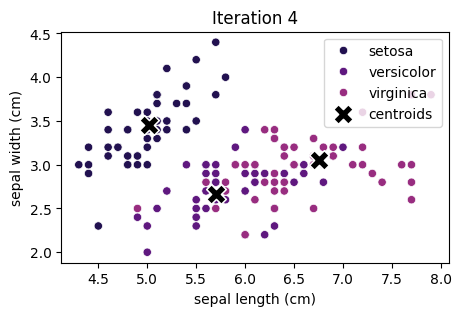

<ipython-input-10-fcd8a68ba6e3>:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.scatterplot(x = x_col, y = y_col, data = df, hue=s, palette = sns.color_palette("magma"))


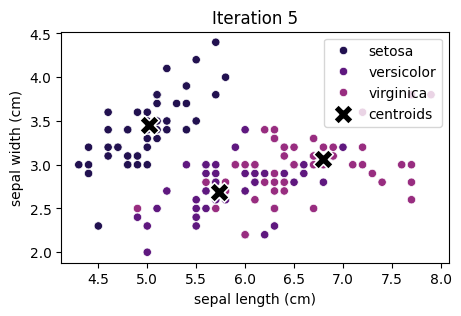

<ipython-input-10-fcd8a68ba6e3>:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.scatterplot(x = x_col, y = y_col, data = df, hue=s, palette = sns.color_palette("magma"))


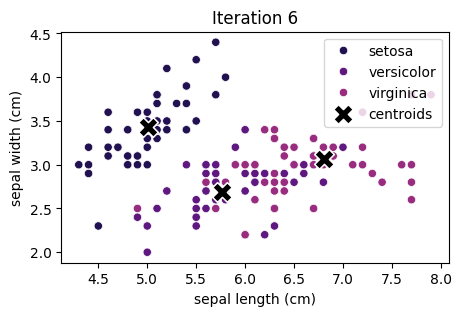

<ipython-input-10-fcd8a68ba6e3>:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.scatterplot(x = x_col, y = y_col, data = df, hue=s, palette = sns.color_palette("magma"))


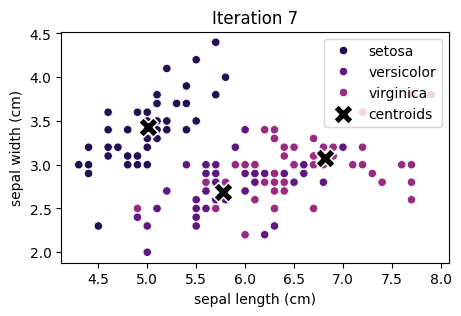

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name,best_cluster
0,5.1,3.5,1.4,0.2,0,setosa,0.0
1,4.9,3.0,1.4,0.2,0,setosa,0.0
2,4.7,3.2,1.3,0.2,0,setosa,0.0
3,4.6,3.1,1.5,0.2,0,setosa,0.0
4,5.0,3.6,1.4,0.2,0,setosa,0.0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica,1.0
146,6.3,2.5,5.0,1.9,2,virginica,2.0
147,6.5,3.0,5.2,2.0,2,virginica,1.0
148,6.2,3.4,5.4,2.3,2,virginica,1.0


In [14]:
find_clusters(df, random_centroid(df, 3), 'species_name')

# Accuracy

In [15]:
def find_accuracy(df, clustered_df):
  correct = 0
  for i in df.index:
    if df.loc[i, 'species'] == clustered_df.loc[i, 'best_cluster']:
      correct += 1
  return correct / len(df)

# Inertia

In [16]:
def find_inertia(df, centroids):
    inertia = 0
    for i in df.index:
        # get cluster
        cluster = df.loc[i, 'best_cluster']
        distance = euclidean_distance(df.loc[i, df.columns[:-1]], centroids.loc[cluster])
        inertia += distance**2
    return inertia

In [17]:
test_df = find_clusters(df, random_centroid(df, 3), 'species_name', draw=False)

In [18]:
def update(df, feature_cols):
  return df.groupby('best_cluster')[feature_cols].mean()

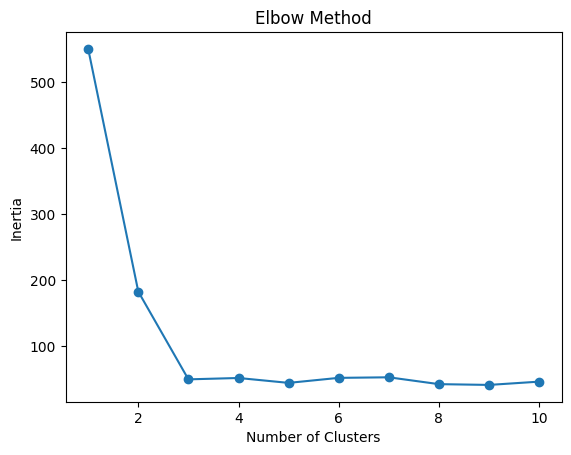

In [19]:
inertias = []
for i in range(1, 11):
    centroids = random_centroid(df, i)
    test_df = find_clusters(df, centroids, 'species_name', draw=False)
    inertia = find_inertia(test_df, update(test_df, ['petal length (cm)', 'petal width (cm)']))
    inertias.append(inertia)


plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


# Initializing Centroids

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   species_name       150 non-null    object 
 6   best_cluster       150 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 8.3+ KB


In [21]:
df['species_numeric'] = df['species_name'].map({
    'setosa': 0,
    'versicolor': 1,
    'virginica': 2
})

df.drop(columns=['species_name'], inplace=True)
df
#drop species_name column and replace it with a numeric version

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,best_cluster,species_numeric
0,5.1,3.5,1.4,0.2,0,7.0,0
1,4.9,3.0,1.4,0.2,0,2.0,0
2,4.7,3.2,1.3,0.2,0,2.0,0
3,4.6,3.1,1.5,0.2,0,2.0,0
4,5.0,3.6,1.4,0.2,0,7.0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,8.0,2
146,6.3,2.5,5.0,1.9,2,0.0,2
147,6.5,3.0,5.2,2.0,2,8.0,2
148,6.2,3.4,5.4,2.3,2,8.0,2


In [22]:
# centroids are chosen sequentially with  each new centroid being selected with a probability proportional to its squared distance from the closest existing centroid
def initialize_centroids(df, k):
  centroids = []
  centroids.append(df.sample(1).iloc[0]) #randomly select first centroid
  for i in range(1, k):
    distances = df.apply(lambda row: min(euclidean_distance(row, centroid) for centroid in centroids), axis=1) # find the minimum distance from each point to the nearest centroid
    probabilities = distances / distances.sum() # find probabilities for selecting the next centroid
    centroids.append(df.sample(1, weights=probabilities).iloc[0]) # pick the next centroid based on the probabilities

  return pd.DataFrame(centroids, columns=df.columns)

In [ ]:
find_clusters(df, initialize_centroids(df, 3), 'species_numeric', draw=False)

# Silhouette Coefficients